## PSPNet

In [1]:
from segnet.utils import infer_dir, infer_img
import matplotlib.pyplot as plt
import cv2

In [2]:
from segnet.keras_segmentation.pretrained import pspnet_50_ADE_20K , pspnet_101_cityscapes, pspnet_101_voc12

model_ade20k = pspnet_50_ADE_20K() # load the pretrained model trained on ADE20k dataset

model_city_scape = pspnet_101_cityscapes() # load the pretrained model trained on Cityscapes dataset

model_pascal_voc = pspnet_101_voc12() # load the pretrained model trained on Pascal VOC 2012 dataset

# load any of the 3 pretrained models

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-11-30 09:30:01.159114: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-30 09:30:01.159223: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
from segnet.keras_segmentation.models.pspnet import pspnet_50, resnet50_pspnet
from segnet.keras_segmentation.models.model_utils import transfer_weights

pretrained_model = pspnet_50 (n_classes = 51)
pretrained_model.load_weights('segnet/pretrained/dataset1/pspnet/five_last_layers/')

model_dataset1 = pspnet_50 (n_classes = 51)
transfer_weights(pretrained_model, model_dataset1)

dir_path_dataset1 = "datasets/dataset1/images_prepped_test/"

Copying weights 


225it [00:00, 345.76it/s]

Copied weights of 121 layers and skipped 0 layers


In [4]:
from segnet.keras_segmentation.pretrained import resnet_pspnet_VOC12_v0_1
from segnet.keras_segmentation.models.pspnet import resnet50_pspnet

# pretrained_model = resnet_pspnet_VOC12_v0_1()
# model_isic = resnet50_pspnet( 
#     n_classes = 2, 
#     input_height=384, input_width=576,
#     )
# transfer_weights(pretrained_model, model_isic)


from segnet.keras_segmentation.models.segnet import resnet50_segnet


for k in []:
    model_isic = resnet50_segnet( 
        n_classes = 2, 
        input_height=384, input_width=576,
    )

    for layer in model_isic.layers[:-3]:
        layer.trainable = False

    model_isic.train(
        train_images =  "datasets/ISIC2016/diff_tailles_dataset/" +str(k) + "/train_data",
        train_annotations = "datasets/ISIC2016/diff_tailles_dataset/" +str(k) + "/train_annotation",
        # checkpoints_path = "segnet/tmp/ISIC2016/resnet_pspnet_VOC12/all_layers/" ,
        epochs=10,

    )

    dir_path_isic = "datasets/ISIC2016/diff_tailles_dataset/test_data/"
    infer_dir(model_isic,dir_path_isic,20,k= k)

# model_isic.save_weights("segnet/pretrained/resize/ISIC2016/segnet/50_images")

Verifying training dataset


100%|██████████| 50/50 [00:00<00:00, 167.88it/s]


Dataset verified! 
Epoch 1/10


2022-11-30 09:30:16.908716: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-30 09:30:19.099064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


512/512 [==============================] - 80s 151ms/step - loss: 0.3865 - accuracy: 0.8390
Epoch 2/10
512/512 [==============================] - 76s 148ms/step - loss: 0.3563 - accuracy: 0.8543
Epoch 3/10
512/512 [==============================] - 73s 143ms/step - loss: 0.3509 - accuracy: 0.8569
Epoch 4/10
512/512 [==============================] - 74s 144ms/step - loss: 0.3484 - accuracy: 0.8582
Epoch 5/10
512/512 [==============================] - 74s 145ms/step - loss: 0.3462 - accuracy: 0.8591
Epoch 6/10
512/512 [==============================] - 73s 143ms/step - loss: 0.3454 - accuracy: 0.8595
Epoch 7/10
512/512 [==============================] - 70s 137ms/step - loss: 0.3437 - accuracy: 0.8602
Epoch 8/10
512/512 [==============================] - 72s 141ms/step - loss: 0.3432 - accuracy: 0.8604
Epoch 9/10
512/512 [==============================] - 73s 143ms/step - loss: 0.3422 - accuracy: 0.8608
Epoch 10/10
512/512 [==============================] - 72s 140ms/step - loss: 0.3414

In [5]:
# model_isic = resnet50_pspnet(n_classes = 2)
# model_isic.load_weights("segnet/pretrained/resize/ISIC2016/50_images/")

# model_isic = resnet50_segnet(n_classes = 2)
# model_isic.load_weights("segnet/pretrained/resize/ISIC2016/segnet/50_images")

# dir_path_isic = "datasets/ISIC2016/diff_tailles_dataset/test_data/"

In [42]:
# infer_img(model_dataset1,img_path)
# infer_img(model_isic,img_path)

datasets/ISIC2016/diff_tailles_dataset/test_data/ISIC_0009940.jpg
1/1 [==============================] - 0s 154ms/step


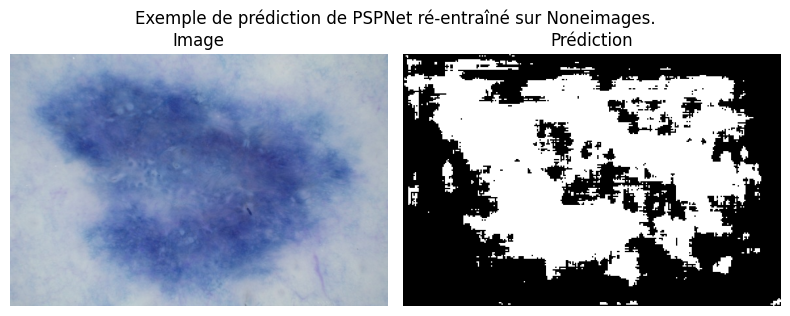

datasets/ISIC2016/diff_tailles_dataset/test_data/ISIC_0007038.jpg
1/1 [==============================] - 0s 104ms/step


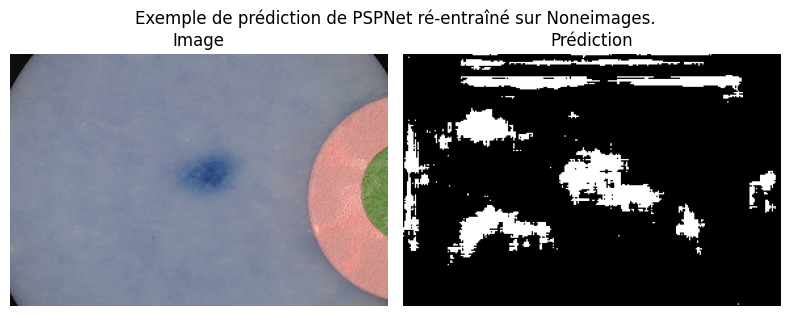

datasets/ISIC2016/diff_tailles_dataset/test_data/ISIC_0010168.jpg
1/1 [==============================] - 0s 85ms/step


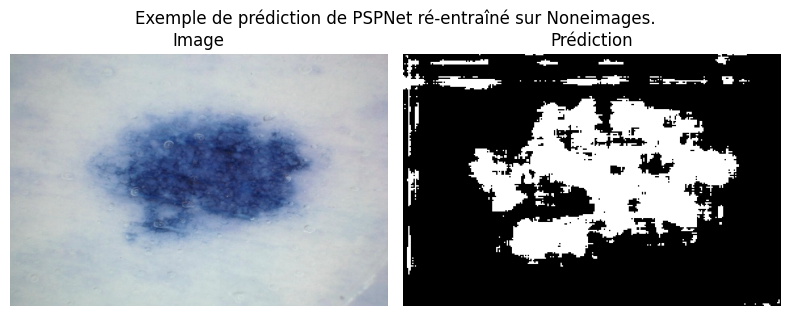

datasets/ISIC2016/diff_tailles_dataset/test_data/ISIC_0000353.jpg
1/1 [==============================] - 0s 87ms/step


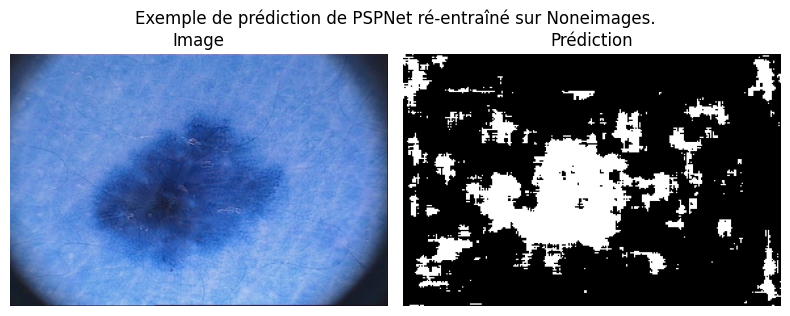

datasets/ISIC2016/diff_tailles_dataset/test_data/ISIC_0001105.jpg
1/1 [==============================] - 0s 94ms/step


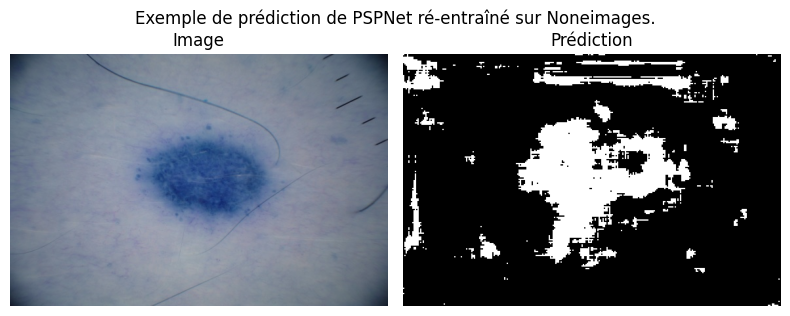

datasets/ISIC2016/diff_tailles_dataset/test_data/ISIC_0001449.jpg
1/1 [==============================] - 0s 84ms/step


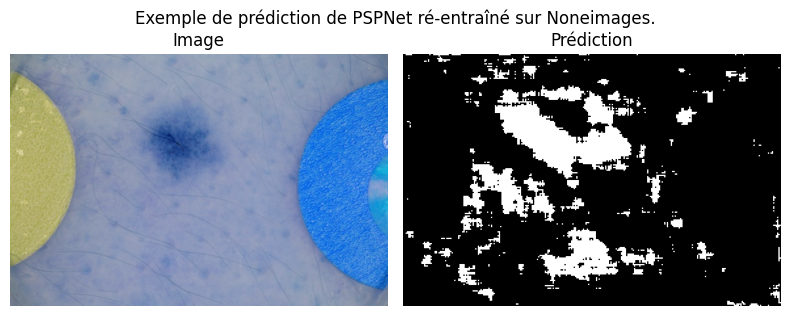

datasets/ISIC2016/diff_tailles_dataset/test_data/ISIC_0010236.jpg
1/1 [==============================] - 0s 95ms/step


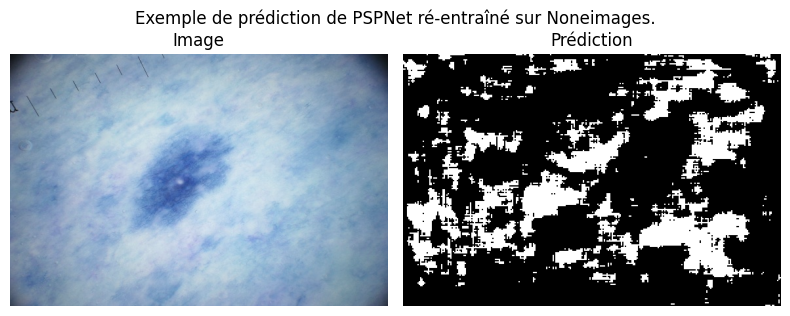

datasets/ISIC2016/diff_tailles_dataset/test_data/ISIC_0000541.jpg
1/1 [==============================] - 0s 79ms/step


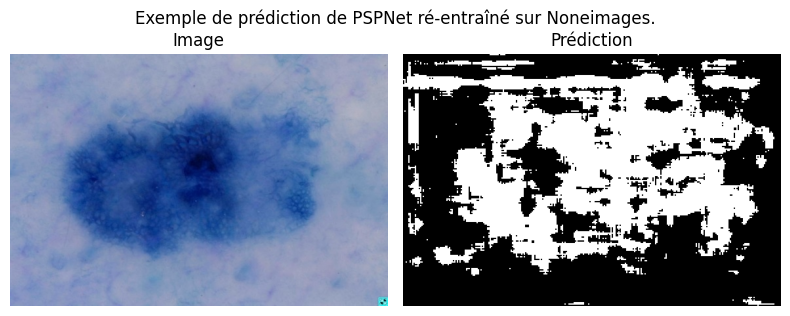

datasets/ISIC2016/diff_tailles_dataset/test_data/ISIC_0009968.jpg
1/1 [==============================] - 0s 107ms/step


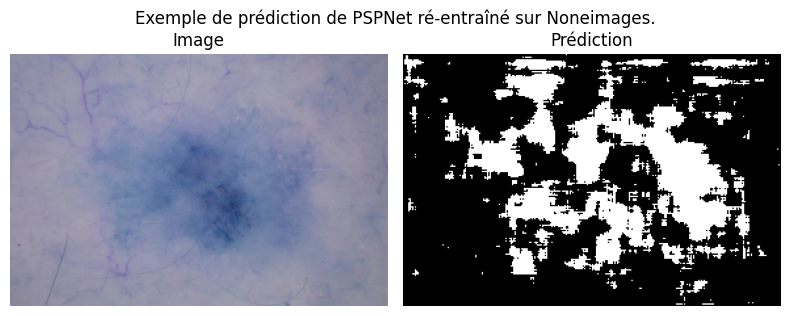

datasets/ISIC2016/diff_tailles_dataset/test_data/ISIC_0010593.jpg
1/1 [==============================] - 0s 83ms/step


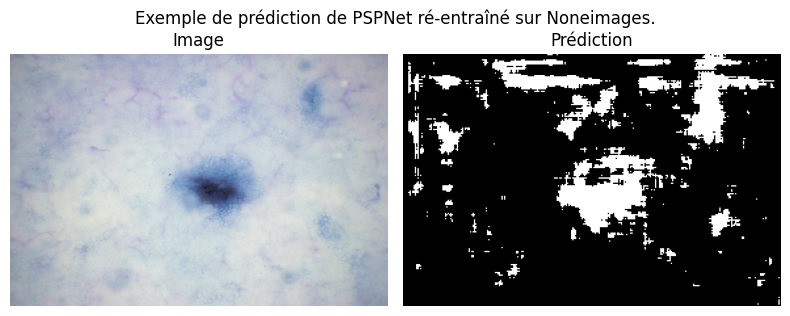

datasets/ISIC2016/diff_tailles_dataset/test_data/ISIC_0009983.jpg
1/1 [==============================] - 0s 97ms/step


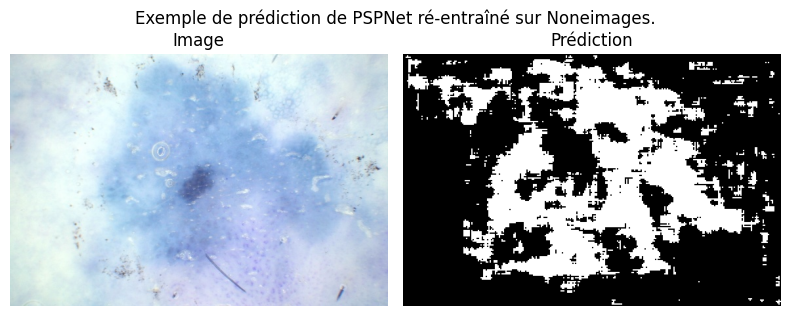

datasets/ISIC2016/diff_tailles_dataset/test_data/ISIC_0000409.jpg
1/1 [==============================] - 0s 110ms/step


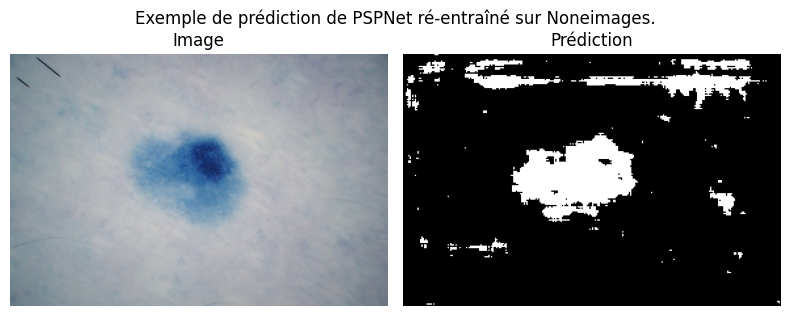

datasets/ISIC2016/diff_tailles_dataset/test_data/ISIC_0011128.jpg
1/1 [==============================] - 0s 89ms/step


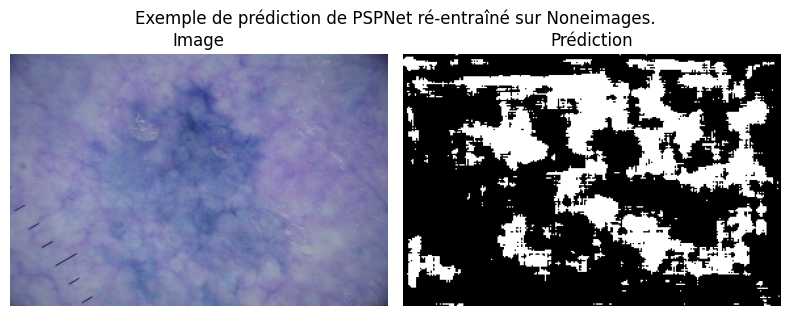

datasets/ISIC2016/diff_tailles_dataset/test_data/ISIC_0006326.jpg
1/1 [==============================] - 0s 106ms/step


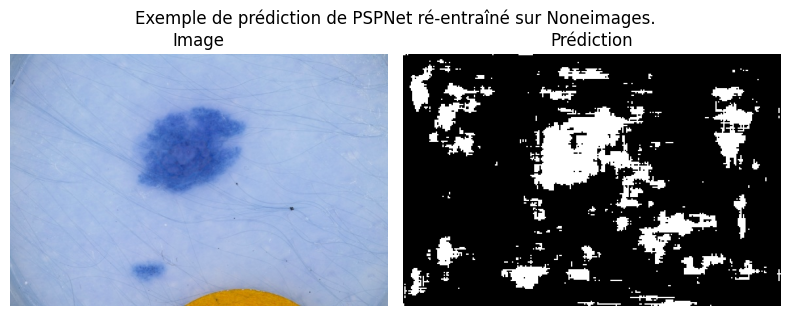

datasets/ISIC2016/diff_tailles_dataset/test_data/ISIC_0011100.jpg
1/1 [==============================] - 0s 105ms/step


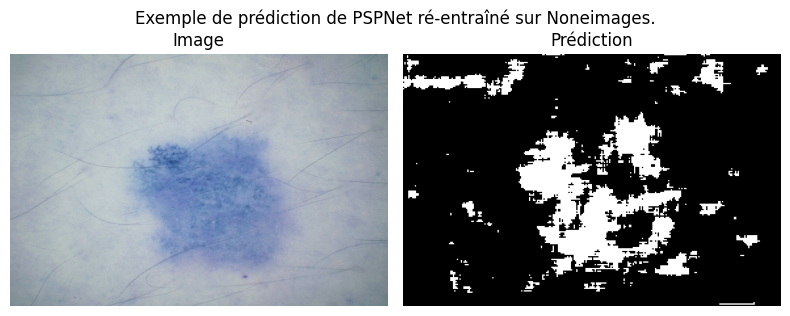

datasets/ISIC2016/diff_tailles_dataset/test_data/ISIC_0000555.jpg
1/1 [==============================] - 0s 99ms/step


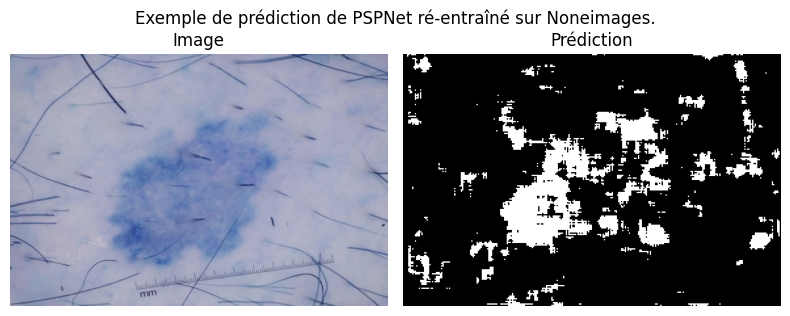

datasets/ISIC2016/diff_tailles_dataset/test_data/ISIC_0000347.jpg
1/1 [==============================] - 0s 110ms/step


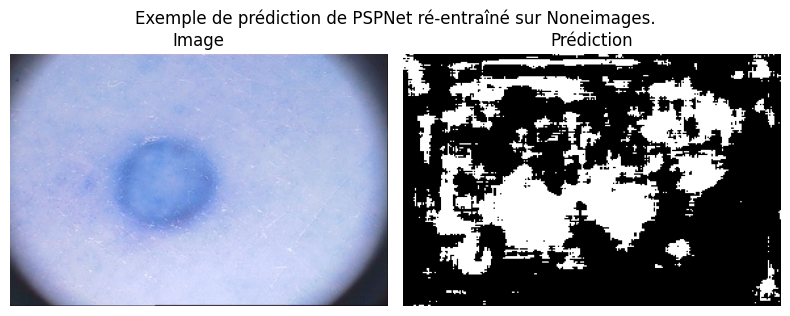

datasets/ISIC2016/diff_tailles_dataset/test_data/ISIC_0000421.jpg
1/1 [==============================] - 0s 109ms/step


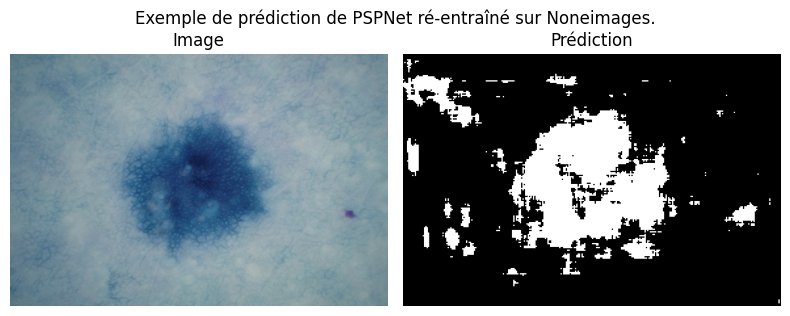

datasets/ISIC2016/diff_tailles_dataset/test_data/ISIC_0010222.jpg
1/1 [==============================] - 0s 100ms/step


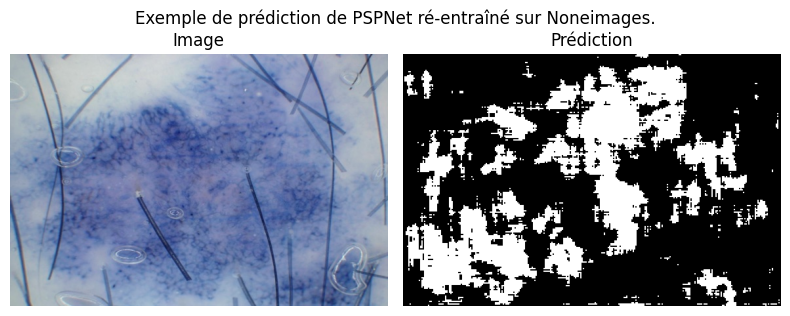

datasets/ISIC2016/diff_tailles_dataset/test_data/ISIC_0011114.jpg
1/1 [==============================] - 0s 91ms/step


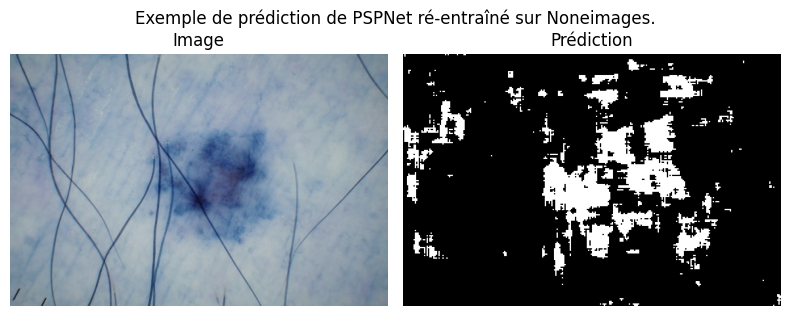

In [43]:
# infer_dir(model_isic,dir_path_isic,20)
# infer_dir(model_dataset1,dir_path_dataset1,20)